# Capstone Project-- The Battle of Neighborhoods (Week 2)

## Applied Data Science Capstone Project by IBM

### Table of contents

1. <a href="#item1">Introduction: Business Problem</a>
2. <a href="#item2">Data</a>  
3. <a href="#item3">Methodology</a>  
4. <a href="#item4">Results</a>  
5. <a href="#item5">Discussions</a>  
6. <a href="#item6">Conclusion</a>

## 1. Introduction: Business Problem

### 1.1 Problem Statement: To open an Indian Restaurant in Toronto, Canada.

Toronto, the capital of the province of Ontario, is the most populous Canadian city. Its diversity is reflected in Toronto’s ethnic neighborhoods such as Chinatown, Corso Italia, Greektown, Kensington Market, Koreatown, Little India, Little Italy, Little Jamaica, Little Portugal & Roncesvalles. 

One of the most immigrant-friendly cities in North America with more than half of the entire Indian Canadian population residing in Toronto it is one of the best places to start an Indian restaurant.

In this project we will go through step by step process to make a decision whether it is a good idea to open an Indian restaurant. We analyze the neighborhoods in Toronto to identify the most profitable area since the success of the restaurant depends on the people and ambience. 

Since we already know that Toronto shelter a greater number of Indians than any other city in Canada, it is a good idea to start the restaurant here, but we just need to make sure whether it is a profitable idea or not. If so, where we can place it, so it yields more profit to the owner.

### 1.2 Target Audience

1) Business personnel who wants to invest or open an Indian restaurant in Toronto. This analysis will be a comprehensive guide to start or expand restaurants targeting the Indian crowd.


2) Freelancer who loves to have their own restaurant as a side business. This analysis will give an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.

3) Indian crowd who wants to find neighborhoods with lots of option for Indian restaurants.

4) Business Analyst or Data Scientists, who wish to analyze the neighborhoods of Toronto using Exploratory Data Analysis and other statistical & machine learning techniques to obtain all the necessary data, perform some operations on it and, finally be able to tell a story out of it.

This idea of analysis is good for someone looking to open an restaurant in the indian dense populated city.And also it is helpful for any contractor to take up this idea and do the business.

# 2. Data

## 2.1 Data sources

a) I’m using “List of Postal code of Canada: M” (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) wiki page to get all the information about the neighborhoods present in Toronto. This page has the postal code, borough & the name of all the neighborhoods present in Toronto.

b) Then I’m using “https://cocl.us/Geospatial_data” csv file to get all the geographical coordinates of the neighborhoods.

c) To get information about the distribution of population by their ethnicity I’m using “Demographics of Toronto” (https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity) wiki page. Using this page I’m going to identify the neighborhoods which are densely populated with Indians as it might be helpful in identifying the suitable neighborhood to open a new Indian restaurant.

d) To get location and other information about various venues in Toronto I’m using Foursquare’s explore API. Using the Foursquare’s explore API (which gives venues recommendations), I’m fetching details about the venues up present in Toronto and collected their names, categories and locations (latitude and longitude).

e) From Foursquare API (https://developer.foursquare.com/docs), I retrieved the following for each venue:

- Name: The name of the venue.
- Category: The category type as defined by the API.
- Latitude: The latitude value of the venue.
- Longitude: The longitude value of the venue.   

The following Libraries are used:

- pandas
- requests
- folium
- numpy
- matplotlib
- json
- KMeans

## 2.2 Data Cleaning

### a) Scraping Toronto Neighborhoods Table from Wikipedia

Assumptions made to attain the below DataFrame:


- Dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
- Only the cells that have an assigned borough will be processed. Borough that is not assigned are ignored.
- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
- If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

Before proceeding to the formation of Dataframe, let us first import all the dependencies we need.

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5.

Let's convert the dataset into *pandas* Dataframe

In [5]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSSlio5lonR4Qo0GLehg6c3hH28ITOoin6XBZlipMCCh5OVzSDQwfezkNrmQH8msXY12rL8NpT2dJWW/pub?gid=0&single=true&output=csv')
df.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


Adding geographical coordinates to the neighborhoods

In [6]:
import io
import requests

url = "https://cocl.us/Geospatial_data"
lat_long = requests.get(url).text
lat_long_df = pd.read_csv(io.StringIO(lat_long))
lat_long_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Now i will merge both the Dataframes into one by merging on the Postal code

In [7]:
df_toronto = pd.merge(df, lat_long_df, on='Postal Code')
df_toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


let's count the size of our Dataframe

In [8]:
print('The Dataframe has {} boroughs and {} neighborhoods'.format(len(df_toronto['Borough'].unique()),
        df_toronto.shape[0]
    )
)

The Dataframe has 10 boroughs and 103 neighborhoods


### b) Scrap the distribution of population from Wikipedia

Another factor that can help us in deciding which neighborhood would be best option to open a restaurant is, the distribution of population based on the ethnic diversity for each neighborhood.

As this helps us in identifying the neighborhoods which are densely populated with Indian crowd since that neighborhood would be an ideal place to open an Indian restaurant.

let's import the wikipedia

In [9]:
# import the library we use to open URLs
import urllib.request

# specify which URL/web page we are going to be scraping
url = "https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity"

# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)
page

Extract the Population and ethnic origin data of Toronto & East York

In [10]:
import pandas as pd
Toronto_EY = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQL1cWI_PFAwlCiiFT0eQTiQbMa5wbGAYLhEstEs43cmyOdjQKbTfR4e3DcL7iwWzQt51h451POJvOD/pub?gid=0&single=true&output=csv')
Toronto_EY

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7,Ethnic Origin #9,%.8
0,Spadina-Fort York,"114,315",English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,"108,435",English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,"107,395",Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,"106,445",English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,"105,395",English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,"104,940",English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,"100,520",English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,"99,590",English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


Extract the Population and ethnic origin data of North York

In [11]:
North_York = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQL1cWI_PFAwlCiiFT0eQTiQbMa5wbGAYLhEstEs43cmyOdjQKbTfR4e3DcL7iwWzQt51h451POJvOD/pub?gid=1694209099&single=true&output=csv')
North_York


,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Willowdale,"117,405",Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,"112,925",Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,"109,060",Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,"107,725",Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,"103,760",Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,"101,790",English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,"93,170",East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


Extract the Population and ethnic origin data of Scarborough

In [12]:
Scarborough = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQL1cWI_PFAwlCiiFT0eQTiQbMa5wbGAYLhEstEs43cmyOdjQKbTfR4e3DcL7iwWzQt51h451POJvOD/pub?gid=1780486015&single=true&output=csv')
Scarborough

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Scarborough Centre,"110,450",Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,"108,295",Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,"104,225",Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,"101,445",East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,"101,115",East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough-Guildwood,"101,115",East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN


Extract the Population and ethnic origin data of Etobicoke & york

In [13]:
E_york = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQL1cWI_PFAwlCiiFT0eQTiQbMa5wbGAYLhEstEs43cmyOdjQKbTfR4e3DcL7iwWzQt51h451POJvOD/pub?gid=1923583480&single=true&output=csv')
E_york

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Etobicoke-Lakeshore,"127,520",English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,"116,960",East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,"116,055",Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,"115,130",Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### c) Get location data using Foursquare

Foursquare API is very useful online application used my many developers & other applications like Uber etc. In this project I have used it to retrieve information about the places present in the neighborhoods of Toronto. The API returns a JSON file and we need to turn that into a data-frame. Here I’ve chosen 100 popular spots for each neighborhood within a radius of 1km.

#### Define Foursquare Credentials and Version

In [14]:
CLIENT_ID = 'N4WQI4SR4G5FOLG5T54ASPZQ5NN4S1VIHGD1JZGMUYRQIPLC' # your Foursquare ID
CLIENT_SECRET = 'WJHE2W02BAFKWIKILWIEV1LHU1UC2DNZV12L11GAMIBRYWE2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: N4WQI4SR4G5FOLG5T54ASPZQ5NN4S1VIHGD1JZGMUYRQIPLC
CLIENT_SECRET:WJHE2W02BAFKWIKILWIEV1LHU1UC2DNZV12L11GAMIBRYWE2


let's define geographical co-ordinates of toronto city using address

In [15]:
address = 'toronto, canada'

geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of toronto city are 43.6534817, -79.3839347.


Now, let's get the top 100 venues of toronto within a radius of 1000 meters and retrieve the json file from Foursquare API

In [16]:
LIMIT = 100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5efc9476ffc68c02669321fa'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 239,
  'suggestedBounds': {'ne': {'lat': 43.66248170900001,
    'lng': -79.37151886118865},
   'sw': {'lat': 43.64448169099999, 'lng': -79.39635053881135}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
  

let's borrow the get_category_type function from the Foursquare lab.

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Indigo,Bookstore,43.653515,-79.380696
3,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684
4,Textile Museum of Canada,Art Museum,43.654396,-79.386500


And how many venues were returned by Foursquare?

In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
     
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [21]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

Let's check the size of the resulting dataframe

In [22]:
print(toronto_venues.shape)
toronto_venues.head()

(4919, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
2,Parkwoods,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café
3,Parkwoods,43.753259,-79.329656,Bruno's valu-mart,43.746143,-79.324630,Grocery Store
4,Parkwoods,43.753259,-79.329656,High Street Fish & Chips,43.745260,-79.324949,Fish & Chips Shop


# 3. Methodology

## 3.1 Exploratory Data Analysis

### 3.1.1 Folium Library and Leaflet Map

Folium is a python library, I’m using it to draw an interactive leaflet map using coordinate data.

 Create a map of toronto city with neighborhoods.

In [23]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### 3.1.2 Relationship between Borough and Indian Restaurant

First we will extract the Neighborhood and Indian Restaurant column from the above toronto dataframe for further analysis:

Let's check how many venues were returned for each neighborhood

In [24]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,44,44,44,44,44,44
"Alderwood, Long Branch",26,26,26,26,26,26
"Bathurst Manor, Wilson Heights, Downsview North",30,30,30,30,30,30
Bayview Village,15,15,15,15,15,15
"Bedford Park, Lawrence Manor East",40,40,40,40,40,40
Berczy Park,100,100,100,100,100,100
"Birch Cliff, Cliffside West",12,12,12,12,12,12
"Brockton, Parkdale Village, Exhibition Place",100,100,100,100,100,100
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",47,47,47,47,47,47


In [25]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo,Accessories Store,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Light Rail Station,Lighting Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup

And let's examine the new dataframe size.

In [26]:
toronto_onehot.shape

(4919, 331)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [81]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Zoo,Accessories Store,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Light Rail Station,Lighting Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup

Now extract the Neighborhood and Indian Restaurant columns from the above dataframe

In [28]:
toronto_part = toronto_grouped[['Neighborhood', 'Indian Restaurant']]
toronto_part.head()

,Neighborhood,Indian Restaurant
0,Agincourt,0.022727
1,"Alderwood, Long Branch",0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.025000


Finally let's merge the toronto dataframe with the above toronto part.

In [29]:
toronto_merged = pd.merge(df_toronto, toronto_part, on='Neighborhood')
toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Indian Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.00
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.00
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.02
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.00
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.01


In [57]:
df_violin = toronto_merged[['Borough', 'Indian Restaurant']]
df_violin1 = df_violin.set_index('Borough')
df_violin1.head()

,Indian Restaurant
Borough,
North York,0.00
North York,0.00
Downtown Toronto,0.02
North York,0.00
Downtown Toronto,0.01


Let’s try to draw violin plot using the above dataframe:

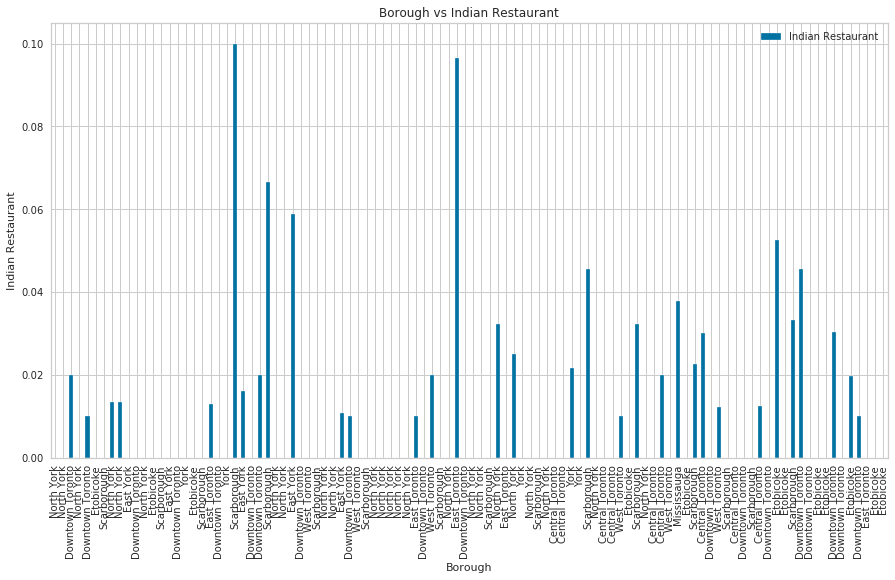

In [148]:
df_violin1.plot(kind='bar', figsize=(15, 8), rot=90)

plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Indian Restaurant') # add y-label to the plot
plt.title('Borough vs Indian Restaurant') # add title to the plot

plt.show()

With the help of this Bar charts we can identify the boroughs with densely populated Indian restaurants. It is drawn using seaborn library to show the distribution of Indian restaurants in different boroughs.

### 3.1.3 Relationship Between Neighborhood and Indian Restaurants

Let’s also visualize the neighborhood with Indian Restaurants:

In [62]:
df_bar = toronto_merged[['Neighborhood', 'Indian Restaurant']].head(12)
df_bar1 = df_bar.set_index('Neighborhood')
df_bar1

,Indian Restaurant
Neighborhood,
Parkwoods,0.000000
Victoria Village,0.000000
"Regent Park, Harbourfront",0.020000
"Lawrence Manor, Lawrence Heights",0.000000
"Queen's Park, Ontario Provincial Government",0.010000
"Islington Avenue, Humber Valley Village",0.000000
"Malvern, Rouge",0.000000
Don Mills,0.013333
Don Mills,0.013333


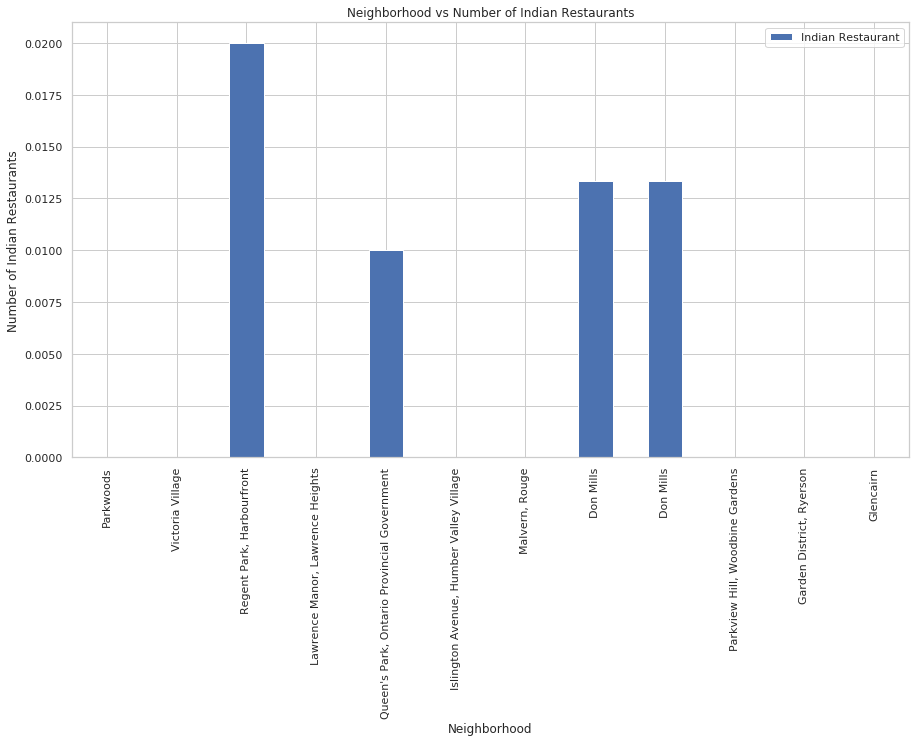

In [63]:
df_bar1.plot(kind='bar', figsize=(15, 8), rot=90)

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Indian Restaurants') # add y-label to the plot
plt.title('Neighborhood vs Number of Indian Restaurants') # add title to the plot

plt.show()

### 3.1.4 Relationship between neighborhood and Indian population

Another key feature is the distribution of Indian crowd in each neighborhoods. Let us analyze the neighborhoods and identify the neighborhoods with highest number of Indian population.

To achieve that we are joining all the neighborhood’s dataframe from using the spreadsheet page with ethnic population and in that we are extracting just the Indian population for each neighborhood.

In [77]:
Indian = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQL1cWI_PFAwlCiiFT0eQTiQbMa5wbGAYLhEstEs43cmyOdjQKbTfR4e3DcL7iwWzQt51h451POJvOD/pub?gid=121616536&single=true&output=csv')
Indian.head()

,Riding,Population,Ethnic origin,Percentage %
0,Don Valley North,109060,East Indian,7.3
1,Humber River-Black Creek,107725,East Indian,9.2
2,Don Valley East,93170,East Indian,10.6
3,Scarborough Centre,110450,East Indian,12.2
4,Scarborough Southwest,108295,East Indian,8.2


Let’s draw a graph to visualize the population spread in neighborhood.Before that we filter the Dataframe.

In [78]:
Indian_bar = Indian[['Riding', 'Population']].set_index('Riding')
Indian_bar['Population'] = Indian_bar['Population'].astype(int)
Indian_bar

,Population
Riding,
Don Valley North,109060
Humber River-Black Creek,107725
Don Valley East,93170
Scarborough Centre,110450
Scarborough Southwest,108295
Scarborough-Agincourt,104225
Scarborough-Rouge Park,101445
Scarborough-Guildwood,101115
Scarborough-Guildwood,101115


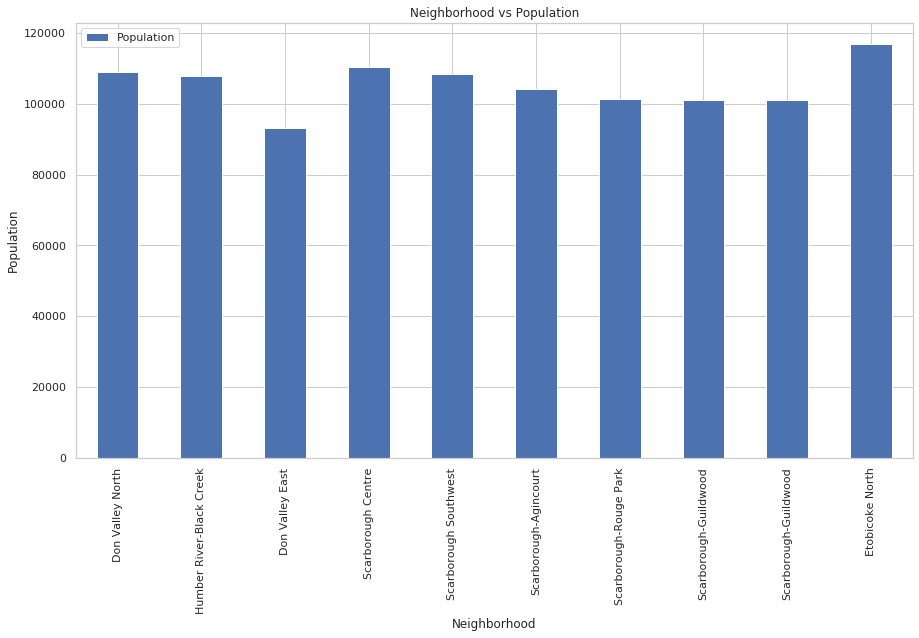

In [79]:
Indian_bar.plot(kind='bar', figsize=(15, 8), rot=90)

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Neighborhood vs Population') # add title to the plot

plt.show()

This analysis & visualization of the relationship between neighborhoods & Indian population present in those neighborhoods helps us in identifying the highly populated Indian neighborhoods. Once we identify those neighborhoods it helps us in deciding where to place the new Indian restaurant.

Indian restaurant placed in an densely populated Indian neighborhood is more likely to get more Indian customers than a restaurant placed in a neighborhood with less or no Indian population. Thus this analysis helps in the determining the success of the new Indian restaurant.

### 3.1.5 Relationship between Indian population and Indian restaurant

After performing the data cleaning & data analysis we couldn’t identify a big relationship established between densely populated Indian neighborhoods & number of Indian restaurants.

This might be because of the missing in data as this an area which can improved in future analysis to get a more insight about the business problem.

## 3.2 Predictive Modelling

### 3.2.1 Clustering Neighborhoods of Toronto

First step in K-means clustering is to identify best K value meaning the number of clusters in a given dataset. To do so we are going to use the elbow method on the Toronto dataset with Indian restaurant percentage.

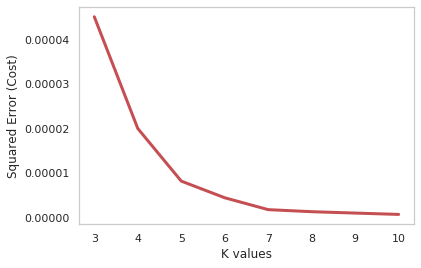

In [83]:
from sklearn.cluster import KMeans

toronto_part_clustering = toronto_part.drop('Neighborhood', 1)

error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter =100)
    try:
        KM.fit(toronto_part_clustering)
    except ValueError:
        print("error on line",i)
        
        
        
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)
    
#plot the K values against the squared error cost
plt.plot(range(3, 11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

     |████████████████████████████████| 266kB 5.9MB/s eta 0:00:01


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


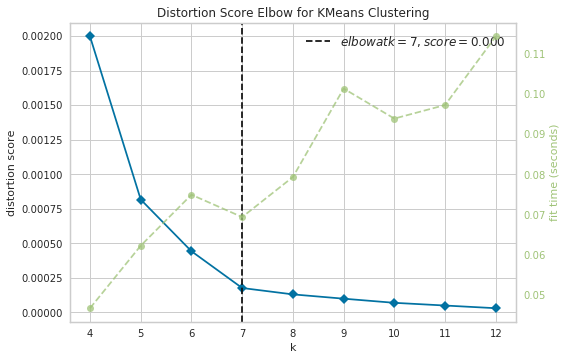

In [91]:
#Instantiate the clustering model and visualizer
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

visualizer.fit(toronto_part_clustering)
visualizer.show()

After analysing using elbow method using distortion score & Squared error for each K value, looks like K = 6 is the best value.

Clustering the Toronto Neighborhood Using K-Means with K =6

In [92]:
kclusters = 6

toronto_part_clustering = toronto_part.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_part_clustering)

kmeans.labels_

array([3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 1, 4, 0, 3, 5, 0, 0, 0, 1, 0, 0,
       5, 4, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 3, 0,
       4, 0, 0, 5, 3, 0, 0, 0, 1, 1, 0, 0, 5, 3, 5, 5, 3, 4, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 2, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster for each neighborhood.

In [126]:
toronto_merged = df_toronto

toronto_merged = toronto_merged.join(toronto_part.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,0.00
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,0.00
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3,0.02
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,0.00
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,5,0.01


Finally, let's visualize the resulting clusters

In [128]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 3.2.2 Examine the Clusters

We have total of 6 clusters such as 0,1,2,3,4,5. Let us examine one after the other.

Cluster 0 contains maximum neighborhoods which has least number of Indian restaurants. It is shown in red color in the map

In [149]:
# cluster 0
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,0.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,0.0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,0.0
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,0,0.0
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0,0.0
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,0,0.0
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,0.0
10,M6B,North York,Glencairn,43.709577,-79.445073,0,0.0
11,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.650943,-79.554724,0,0.0
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0,0.0


Cluster 1 contains the neighborhoods which is sparsely populated with Indian restaurants. It is shown in purple color in the map.


In [133]:
# cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1].head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
52,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,1,0.032258
71,M1R,Scarborough,"Wexford, Maryvale",43.750072,-79.295849,1,0.032258
76,M7R,Mississauga,Canada Post Gateway Processing Centre,43.636966,-79.615819,1,0.037736
79,M4S,Central Toronto,Davisville,43.704324,-79.388790,1,0.030000
90,M1W,Scarborough,"Steeles West, L'Amoreaux West",43.799525,-79.318389,1,0.033333


Cluster 2 contains least neighborhood which is medium populated with Indian restaurants. it is shown in dark blue in the map.


In [134]:
# cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2].head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
22,M1G,Scarborough,Woburn,43.770992,-79.216917,2,0.100000
47,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,2,0.096386


Cluster 3 contains neighborhood which is medium populated with Indian restaurants. it is shown in light blue in the map.

In [135]:
# cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3].head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3,0.020000
23,M4G,East York,Leaside,43.709060,-79.363452,3,0.016129
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564,3,0.020000
43,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,3,0.020000
55,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,3,0.025000


Cluster 4 contains 2nd least neighborhood which is medium populated with Indian restaurants.

In [136]:
# cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4].head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
26,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,4,0.066667
29,M4H,East York,Thorncliffe Park,43.705369,-79.349372,4,0.058824
65,M1P,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",43.757410,-79.273304,4,0.045455
88,M8V,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores",43.605647,-79.501321,4,0.052632
91,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,4,0.045455


Cluster 5 contains 2nd highest neighborhood which is least populated with Indian restaurants. it is shown in orange colour in the map.

In [137]:
# cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5].head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,5,0.010000
7,M3B,North York,Don Mills,43.745906,-79.352188,5,0.013333
13,M3C,North York,Don Mills,43.725900,-79.340923,5,0.013333
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,5,0.012987
35,M4J,East York,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,5,0.010870


# 4. Results 

We have reached the end of the analysis, in this section we will document all the findings from above clustering & visualization of the dataset. In this project, we started off with the business problem of identifying a good neighborhood to open a new Indian restaurant. 

To achieve that we looked into all the neighborhoods in Toronto, analysed the Indian population in each neighborhood & number of Indian restaurants in those neighborhoods to come to conclusion about which neighborhood would be a better spot. We have used variety of data sources to set up a very realistic data-analysis scenario. We have found out that —

- In those boroughs we identified that only Central Toronto, Downtown Toronto, East Toronto, & East York  boroughs have high amount of Indian restaurants with the help of bar plots between Number of Indian restaurants in Borough of Toronto.

- In all the ridings, Scarborough-Guildwood, Scarborough-Rouge Park, Scarborough Centre, Scarborough North, Humber River-Black Creek, Don Valley East, Scarborough Southwest, Don Valley North & Scarborough-Agincourt are the densely populated with Indian crowd ridings.

- With the help of clusters examining looks like Downtown Toronto, Central Toronto, East York are already densely populated with Indian restaurants. So it is better idea to leave those boroughs out and consider only Scarborough, East Toronto & North York for the new restaurant’s location.

- After careful consideration it is a good idea to open a new Indian restaurant in Scarborough borough since it has high number of Indian population which gives a higher number of customers possibility and lower competition since very less Indian restaurants in the neighborhoods.

# 5. Discussions

According to this analysis, Scarborough borough will provide the least competition for the new upcoming Indian restaurant as there is very little Indian restaurants spread or no Indian restaurants in few neighborhoods. Also looking at the population distribution looks like it is densely populated with Indian crowd which helps the new restaurant by providing high customer visit possibility. 

So, definitely this region could potentially be a perfect place for starting a quality Indian restaurants. Some of the drawbacks of this analysis are — the clustering is completely based only on data obtained from Foursquare API. Even Though there are lots of areas where it can be improved yet this analysis has certainly provided us with some good insights, preliminary information on possibilities & a head start into this business problem by setting the step stones properly.

# 6. Conclusion

Finally to conclude this project, We have got a chance to on a business problem like how a real like data scientists would do. We have used many python libraries to fetch the data , to manipulate the contents & to analyze and visualize those datasets. 

We have made use of Foursquare API to explore the venues in neighborhoods of Toronto, then get good amount of data from Wikipedia which we scraped with help of Wikipedia python library and visualized using various plots present in seaborn & matplotlib. We also applied machine learning technique to predict the output given the data and used Folium to visualize it on a map.

Some of the drawbacks or areas of improvements shows us that this analysis can be further improved with the help of more data and different machine learning technique. 

Similarly we can use this project to analysis any scenario such as opening a different cuisine restaurant or opening of a new gym and etc. Hopefully, this project helps acts as initial guidance to take more complex real-life challenges using data-science.